## House Price Assignment --> Advanced Regression 

We are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Import all the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import re

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
##Set Display option for rows and column as 120 so that it will display maximum rows and column
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [3]:
#reading the dataset
house = pd.read_csv(r"C:\Users\ravir\OneDrive\Desktop\Ravi\PGDDS_UPGRAD\Predictive_Analysis_II\Assignment\train.csv")

In [4]:
# summary of the dataset: 
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

-  There are 1460 rows and 81 Column

In [5]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
## shape 
house.shape

(1460, 81)

In [7]:
### Describe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Date check Missing value imputation

In [8]:
house.isna().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

#### We can see there are some missing value for below columns :- 
-  MiscFeature
- Fence
- PoolQC
- GarageCond
- GarageQual
- GarageFinish
- GarageYrBlt
- GarageType
- FireplaceQu,
- Electrical       
- BsmtFinType2    
- BsmtFinType1  
- BsmtExposure
- BsmtCond
- BsmtQual
- MasVnrArea
- MasVnrType
- Alley
- LotFrontage 

- As per Data Disctinorary there can be some house which does not have Garage so in that case all the column associated with Garage can be imputed with "None" that means those House does not have Garage

- GarageCond
- GarageQual
- GarageFinish
- GarageYrBlt
- GarageType

 - Similarly some houses does not basement so all the features associated with basement can be imputed with None that means those house does not have basement 

- BsmtFinType2    
- BsmtFinType1  
- BsmtExposure
- BsmtCond
- BsmtQual

- AS None  is valid value for MasVnrArea and MasVnrType so MasVnrType can be imputed and MasVnrArea will be 0

- As there are some houses which does not have access to Alley so it can be imputed as None

- As there are some house which does not have fireplace so it can also be imputed as None 

- As there can be some houses which does not pool so poolQC can be imputed as none

 - Similarly Fence and misc can imputed as none 


In [9]:
# Set PoolQc to none for missing value
house["PoolQC"] = house["PoolQC"].fillna("None")
# Set MiscFeature to none for missing value
house["MiscFeature"] = house["MiscFeature"].fillna("None")
# Set Alley to none for missing value
house["Alley"] = house["Alley"].fillna("None")
# Set Fence to none for missing value
house["Fence"] = house["Fence"].fillna("None")

#set fireplaceQu to none for missing value
house["FireplaceQu"] = house["FireplaceQu"].fillna("None")

# Set Garage feature to none or 0 for missing value 

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house[col] = house[col].fillna('None')
    
         
house["GarageYrBlt"] = house["GarageYrBlt"].fillna(0)
                                         
 # Set Basement feature to none or 0 for missing value                                        ]:                                         
                                         
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house[col] = house[col].fillna('None')
    
# set Manvnr area to none or 0

house["MasVnrType"] = house["MasVnrType"].fillna("None")
house["MasVnrArea"] = house["MasVnrArea"].fillna(0)



In [10]:

house.shape

(1460, 81)

In [11]:
# Check missing value %age again 

house.isna().mean()*100


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

- There  are only 2 column has missing value after this 

-  Electrical
-  LotFrontage

In [12]:
## Check all the value count for Electrical 
print(house['Electrical'].value_counts(dropna=False))

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64


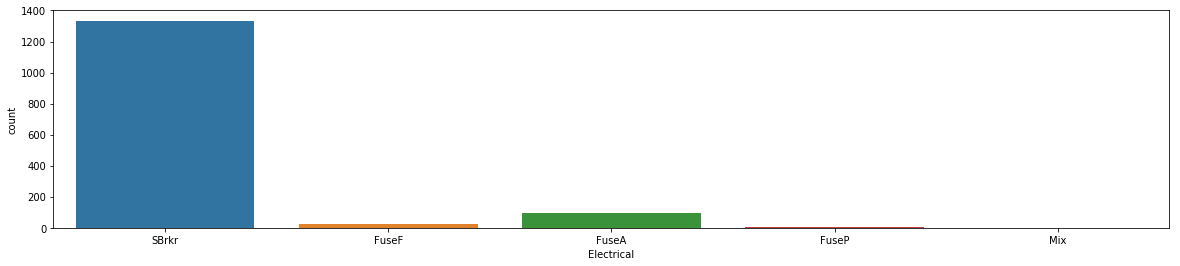

In [13]:
Electrical_1 = house['Electrical']
plt.figure(figsize=(20,4))
sns.countplot(Electrical_1.dropna())
plt.show()

- Electrical : As it has only one Na value and most of the data as "SBrkr" so we can fill this one with "SBrkr" 

In [14]:
## Fill Electrical missing value with SBrkr :-

house["Electrical"] = house["Electrical"].fillna('SBrkr')

In [15]:
## Describe house 
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
### There are almost 200 rows which has LOT frontage as blank , those rows can be filled with Means value which is 70

In [17]:
house["LotFrontage"] = house["LotFrontage"].fillna(house["LotFrontage"].mean())

In [18]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
# Check missing value %age again 

house.isna().mean()*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

- there is no missing value in data now 

In [20]:
### lets check unique value in all the category column to check if there is any other discrepenecy in data or not 

for col in house.columns[2:]:
    if house[col].dtype == 'object':
        print(col)
        print("***************************************")

        print(house[col].value_counts(dropna=False))
        print("----------------------------------------")

MSZoning
***************************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------------------
Street
***************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
----------------------------------------
Alley
***************************************
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
----------------------------------------
LotShape
***************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------------------------------------
LandContour
***************************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
----------------------------------------
Utilities
***************************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
----------------------------------------
LotConfig
***********

In [21]:
### We need to transform some of the numeric variable to categorical as those columns are categorical as per data dictinoary

house['MSSubClass'] = house['MSSubClass'].apply(str)
house['OverallCond'] = house['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
house['YrSold'] = house['YrSold'].astype(str)
house['MoSold'] = house['MoSold'].astype(str)
house['OverallQual'] = house['OverallQual'].astype(str)


In [22]:
#### As Id is unique column for all the rows so it can not be used in model prediction and can be dropped

house.drop(['Id'], axis= 1, inplace = True)

In [23]:
## Lets check shape of data
house.shape


(1460, 80)

 For below column, we observed that most of rows have only one value , thete is on much data varaaince so those columns can be dropped

- As per unique value count , it has been observed that most of the rows has only one value for below columns , there is no much data variance , Lets check those column
- Utilities'
- 'Street' 
- 'Condition2'
- 'RoofMatl'
- 'Heating'
- 'PoolQC


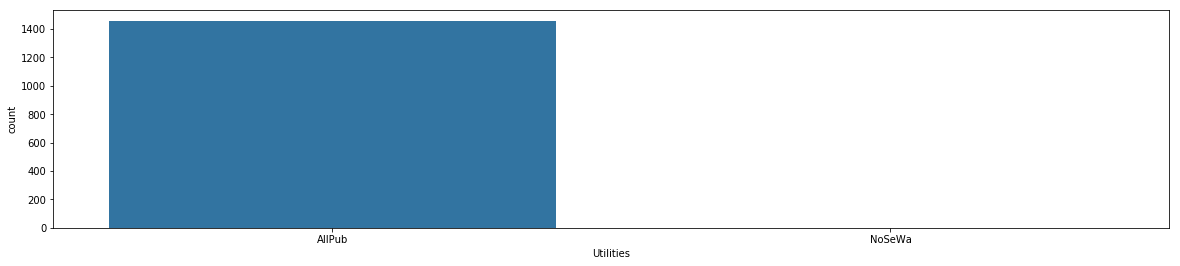

In [24]:
Utility_1= house['Utilities']
plt.figure(figsize=(20,4))
sns.countplot(Utility_1.dropna())
plt.show()

- Most of the values are Allpub for Utility , there is no data variance and it can be dropped 

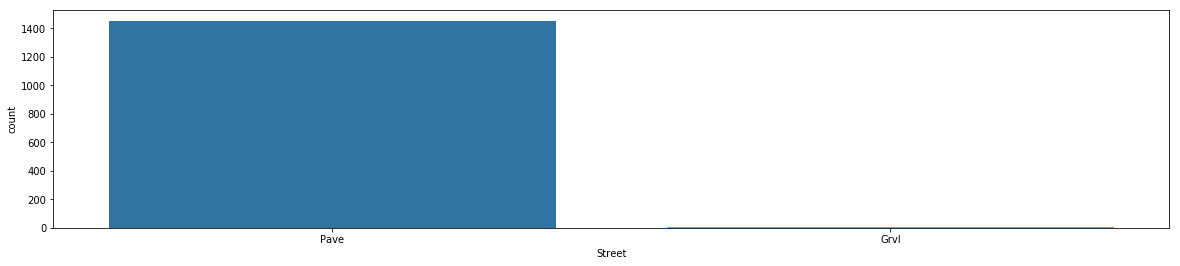

In [25]:
Street_1= house['Street']
plt.figure(figsize=(20,4))
sns.countplot(Street_1.dropna())
plt.show()

- Most of the values are Pave for Street so there is no data variance  and it can be dropped 

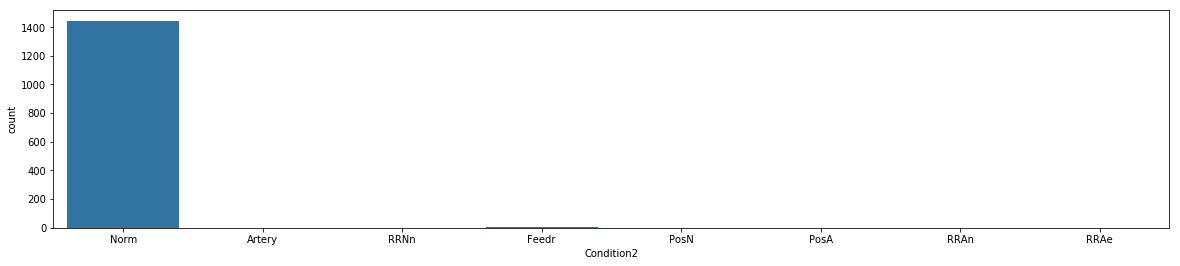

In [26]:
Condition2_1= house['Condition2']
plt.figure(figsize=(20,4))
sns.countplot(Condition2_1.dropna())
plt.show()

- Most of the value for condition2 is Norm , and it can also be dropped

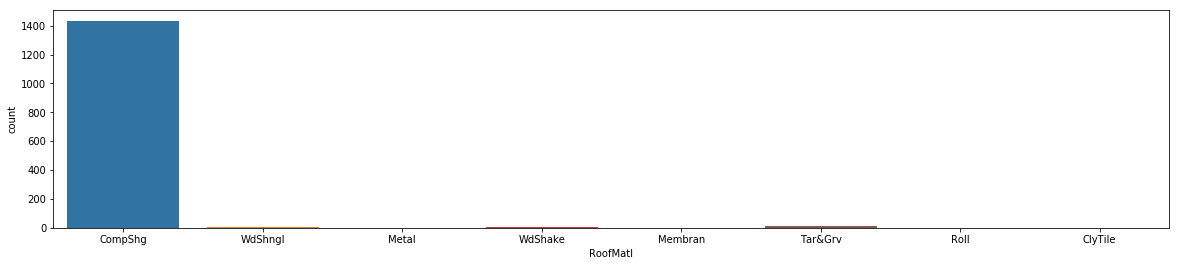

In [27]:
RoofMatl_1= house['RoofMatl']
plt.figure(figsize=(20,4))
sns.countplot(RoofMatl_1.dropna())
plt.show()

- Most of the value for RoofMAll is CompShg and it can be dropped 

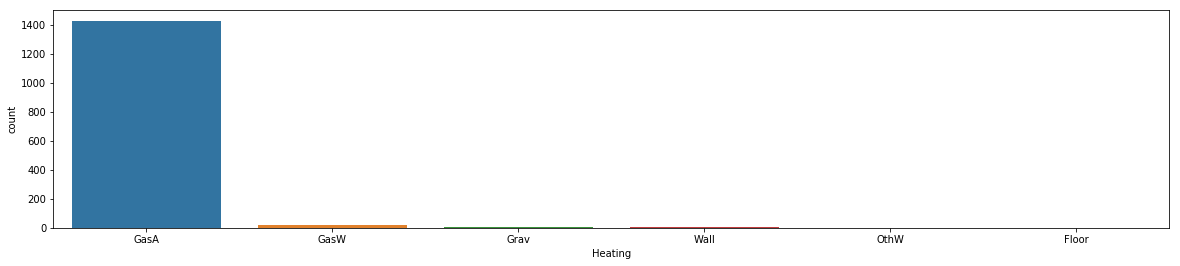

In [28]:
Heating_1= house['Heating']
plt.figure(figsize=(20,4))
sns.countplot(Heating_1.dropna())
plt.show()

-- Most of the value for Heating  is GasA and it can be dropped 

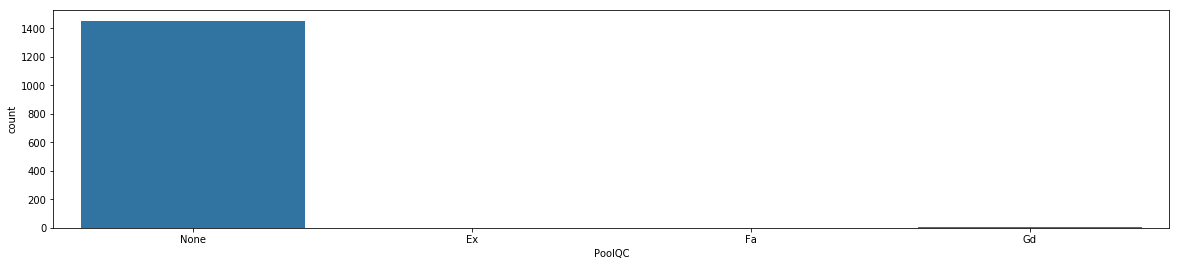

In [29]:
PoolQC= house['PoolQC']
plt.figure(figsize=(20,4))
sns.countplot(PoolQC.dropna())
plt.show()

Most of the value for house are not having pool so this feature can be dropped 

-  Based upon our analysis , we are dropping below fieldss:-
- 'Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'

In [30]:
house.drop(['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'], axis = 1, inplace = True)

In [31]:
## Lets check shape of data after dropping above columns 
house.shape

(1460, 74)

#### Outlier Treatment

In [32]:
# Checking values for different percentiles for numeric variable in House Dataset
house.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
97%,114.000000,21571.800000,2007.000000,2008.000000,573.690000,1375.990000,546.230000,1589.380000,1905.460000,1981.610000,1245.530000,0.000000,2633.230000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,10.000000,2.000000,2008.000000,3.000000,884.000000,385.380000,213.230000,216.000000,0.000000,192.000000,0.000000,400.000000,374230.000000


- Let's check the distributions of all numeric field to check if there is any outlier that need to be removed 

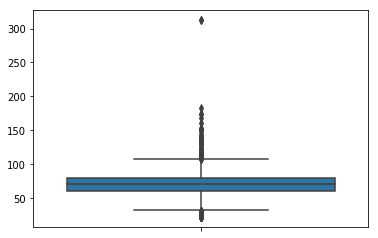

In [33]:
#Distribution of LotFrontage	
sns.boxplot(y = ['LotFrontage'],data = house)
plt.show()

In [34]:
#Checking the number of rows for LotFrontage outliers
house[house.LotFrontage > 300].shape


(2, 74)

In [35]:
# Removing the outlier from LotFrontage
house = house[house.LotFrontage <= 300]

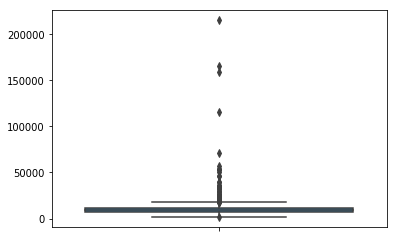

In [36]:
#Distribution of LotArea	
sns.boxplot(y = ['LotArea'],data = house)
plt.show()

In [37]:
#Checking the number of rows for LotArea outliers
house[house.LotArea > 100000].shape


(4, 74)

In [38]:
# Removing the outlier from LotArea outliers
house = house[house.LotArea <= 100000]

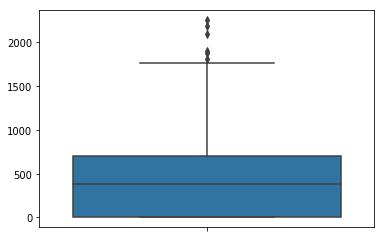

In [39]:
#Distribution of BsmtFinSF1	
sns.boxplot(y = ['BsmtFinSF1'],data = house)

In [40]:
#Checking the number of rows for BsmtFinSF1 outliers
house[house.BsmtFinSF1 > 2000].shape


(3, 74)

In [41]:
# Removing the outlier from BsmtFinSF1
house = house[house.BsmtFinSF1 <= 2000]

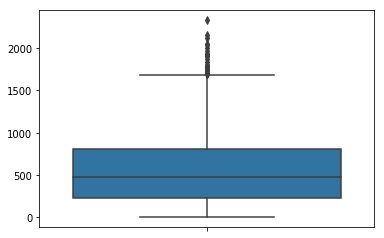

In [42]:
#Distribution of BsmtUnfSF	
sns.boxplot(y = ['BsmtUnfSF'],data = house)

In [43]:
#Checking the number of rows for BsmtFinSF1 outliers
house[house.BsmtUnfSF > 2000].shape

(6, 74)

In [44]:
# Removing the outlier from BsmtUnfSF
house = house[house.BsmtUnfSF <= 2000]

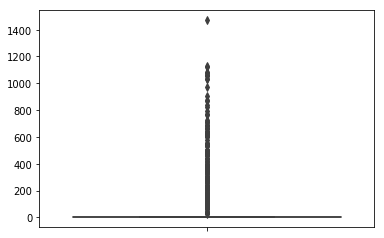

In [45]:
#Distribution of BsmtFinSF2	
sns.boxplot(y = ['BsmtFinSF2'],data = house)

In [46]:
#Checking the number of rows for BsmtFinSF2 outliers
house[house.BsmtFinSF2 > 1200].shape

(1, 74)

In [47]:
# Removing the outlier from BsmtFinSF2
house = house[house.BsmtFinSF2 <= 1200]

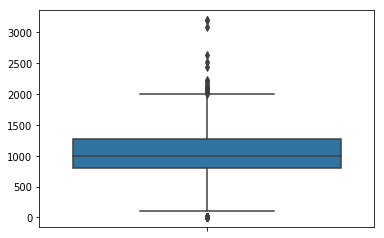

In [48]:
#Distribution of TotalBsmtSF	
sns.boxplot(y = ['TotalBsmtSF'],data = house)

In [49]:
#Checking the number of rows for TotalBsmtSF outliers
house[house.TotalBsmtSF >2500].shape

(5, 74)

In [50]:
# Removing the outlier from TotalBsmtSF
house = house[house.TotalBsmtSF <= 2500]

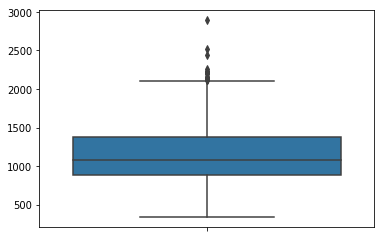

In [51]:
#Distribution of 1stFlrSF	
sns.boxplot(y = ['1stFlrSF'],data = house)

In [52]:
#Checking the number of rows for 1stFlrSF outliers
house[house['1stFlrSF'] >2500].shape

(2, 74)

In [53]:
# Removing the outlier from 1stFlrSF
house = house[house['1stFlrSF'] <= 2500]

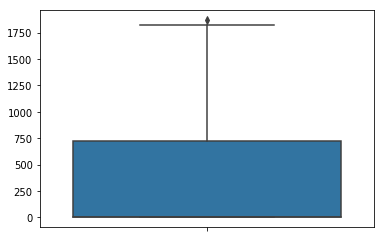

In [54]:
#Distribution of 2ndFlrSF	
sns.boxplot(y = ['2ndFlrSF'],data = house)

In [55]:
#Checking the number of rows for 2ndFlrSF outliers
house[house['2ndFlrSF'] >1750].shape

(3, 74)

In [56]:
# Removing the outlier from 2ndFlrSF
house = house[house['2ndFlrSF'] <= 1750]

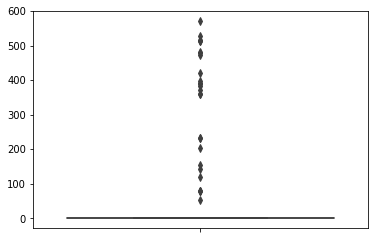

In [57]:
#Distribution of LowQualFinSF	
sns.boxplot(y = ['LowQualFinSF'],data = house)

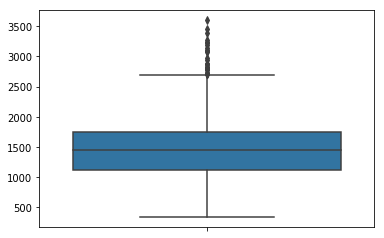

In [58]:
#Distribution of GrLivArea	
sns.boxplot(y = ['GrLivArea'],data = house)

In [59]:
#Checking the number of rows for GrLivArea outliers
house[house.GrLivArea > 3500].shape

(1, 74)

In [60]:
# Removing the outlier from GrLivArea
house = house[house.GrLivArea <= 3500]

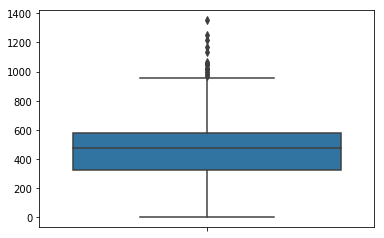

In [61]:
#Distribution of GarageArea	
sns.boxplot(y = ['GarageArea'],data = house)

In [62]:
#Checking the number of rows for GarageArea outliers
house[house.GarageArea > 1200].shape

(3, 74)

In [63]:
# Removing the outlier from GarageArea
house = house[house.GarageArea <= 1200]

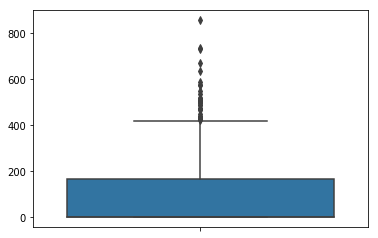

In [64]:
#Distribution of WoodDeckSF	
sns.boxplot(y = ['WoodDeckSF'],data = house)

In [65]:
#Checking the number of rows for WoodDeckSF outliers
house[house.WoodDeckSF > 800].shape


(1, 74)

In [66]:
# Removing the outlier from WoodDeckSF
house = house[house.WoodDeckSF <= 800]

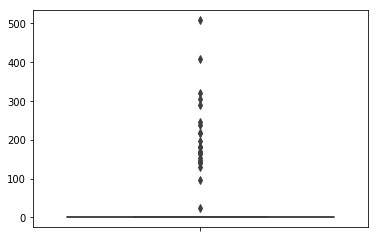

In [67]:
#Distribution of 3SsnPorch	
sns.boxplot(y = ['3SsnPorch'],data = house)

- There are very less houses which has season Porch area so its ok to keep this outlier

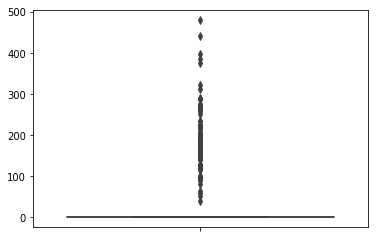

In [68]:
#Distribution of ScreenPorch	
sns.boxplot(y = ['ScreenPorch'],data = house)

- There are very less houses which has ScreenPorch so its ok to keep this outlier 

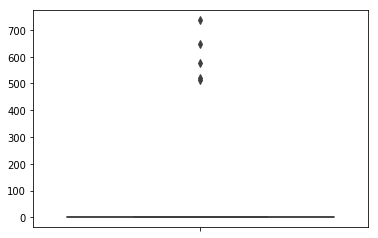

In [69]:
#Distribution of PoolArea	
sns.boxplot(y = ['PoolArea'],data = house)

- There are very less houses which has Pool so its ok to keep this outlier 

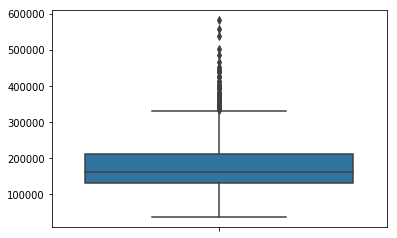

In [70]:
#Distribution of SalePrice	
sns.boxplot(y = ['SalePrice'],data = house)	

- There can be some very costly home in data , that is ok to retain 

In [71]:
house.shape

(1429, 74)

In [72]:
### We have removed (1460-1429) rows for outlier  which is only 2% of total data so that is ok to remove .

In [73]:
### Lets check Sales Price Distribution after removing outlier 

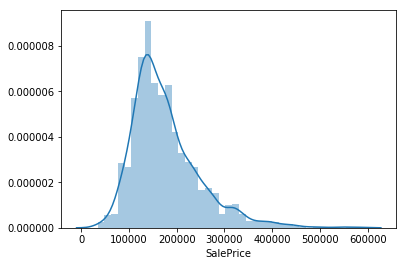

In [74]:
# target variable: Salesprice of House 
sns.distplot(house['SalePrice'])
plt.show()

- AS we have multiple fields that represent Square feet area of the housr so lets add all the fields and find out the total Square feet area of the house

In [75]:
# Adding total sqfootage feature 
house['TotalSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [76]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,2566
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,2524
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,2706
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,2473
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,3343


In [77]:
house.select_dtypes(include=['float64', 'int64']) 

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,65.000000,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,2566
1,80.000000,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,2524
2,68.000000,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,2706
3,60.000000,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,2473
4,84.000000,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,3343
5,85.000000,14115,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,143000,2158
6,75.000000,10084,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,307000,3380
7,70.049958,10382,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,200000,3197
8,51.000000,6120,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,129900,2726
9,50.000000,7420,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,118000,2068


Let's now make a pairwise scatter plot and observe linear relationships.

Text(0,0.5,'SalePrice')

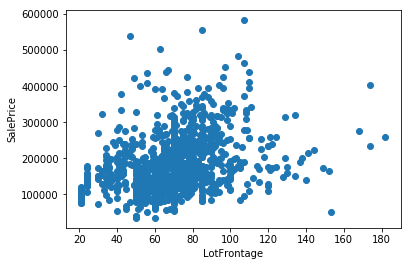

In [78]:
# plot per House Sales Price and Frontage
plt.scatter(house['LotFrontage'], house['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between Lot frontage area and Sales Price but there is some correlation that when LOt Frontage increases , Sales Price increases 

Text(0,0.5,'SalePrice')

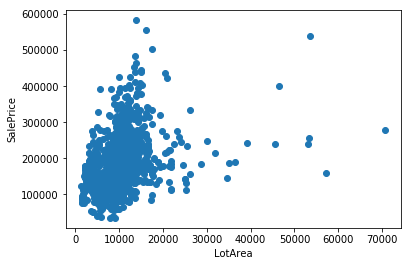

In [79]:
# plot per House Sales Price and LotArea
plt.scatter(house['LotArea'], house['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between LLotArea and Sales Price but there is some correlation that when LotArea increases , Sales Price increases

Text(0,0.5,'SalePrice')

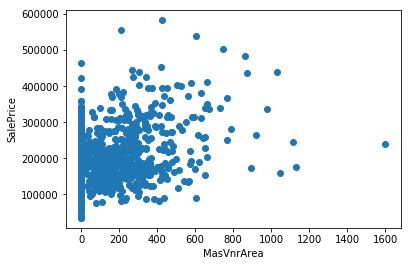

In [80]:
# plot per House Sales Price and MasVnrArea
plt.scatter(house['MasVnrArea'], house['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between MasVnrArea and Sales Price but there is some correlation 

Text(0,0.5,'SalePrice')

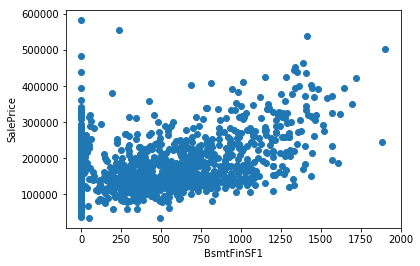

In [81]:
# plot per House Sales Price and BsmtFinSF1
plt.scatter(house['BsmtFinSF1'], house['SalePrice'])
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between BsmtFinSF1 and Sales Price but there is some correlation that when BsmtFinSF1 increases , sales Price increases

Text(0,0.5,'SalePrice')

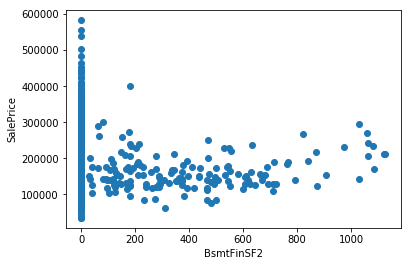

In [82]:
# plot per House Sales Price and BsmtFinSF2
plt.scatter(house['BsmtFinSF2'], house['SalePrice'])
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')

 - We can see there is no much correlation between Sales Price and BsmtFinSF2  

Text(0,0.5,'SalePrice')

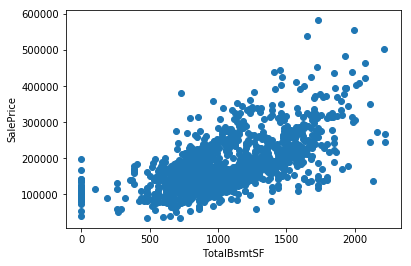

In [83]:
# plot per House Sales Price and TotalBsmtSF
plt.scatter(house['TotalBsmtSF'], house['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between TotalBsmtSF and Sales Price but there is some correlation that when TotalBsmtSF increases , sales Price increases

Text(0,0.5,'SalePrice')

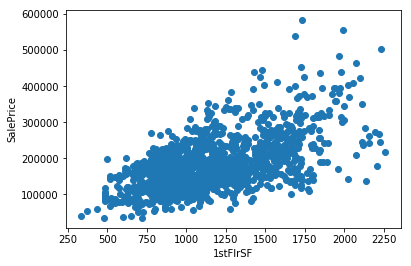

In [84]:
# plot per House Sales Price and 1stFlrSF
plt.scatter(house['1stFlrSF'], house['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

- We can see there is no perfect linear relationship between 1stFlrSF and Sales Price but there is some correlation that when 1stFlrSF increases , sales Price increases

Text(0,0.5,'SalePrice')

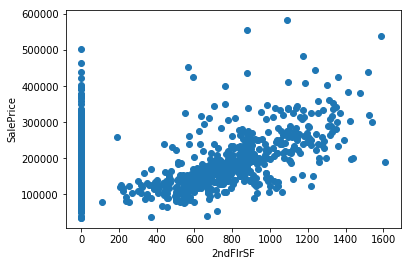

In [85]:
# plot per House Sales Price and '2ndFlrSF',	
plt.scatter(house['2ndFlrSF'], house['SalePrice'])
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')

 We can see there is no perfect linear relationship between 2ndFlrSF and Sales Price but there is some correlation that when 2ndFlrSF increases , sales Price increases

Text(0,0.5,'SalePrice')

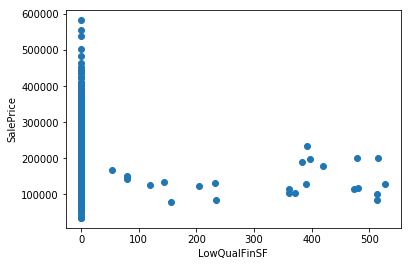

In [86]:
# plot per House Sales Price and LowQualFinSF
plt.scatter(house['LowQualFinSF'], house['SalePrice'])
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')

 - We can see there is no much correlation between Sales Price and LowQualFinSF  

Text(0,0.5,'SalePrice')

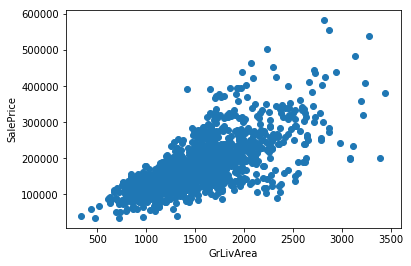

In [87]:
# plot per House Sales Price and GrLivArea
plt.scatter(house['GrLivArea'], house['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

 We can see there is high  some correlation that when GrLivArea increases , sales Price increases

Text(0,0.5,'SalePrice')

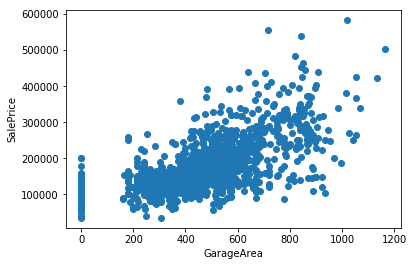

In [88]:
# plot per House Sales Price and GarageArea
plt.scatter(house['GarageArea'], house['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

 We can see there is high  some correlation that when GarageArea increases , sales Price increases

Text(0,0.5,'SalePrice')

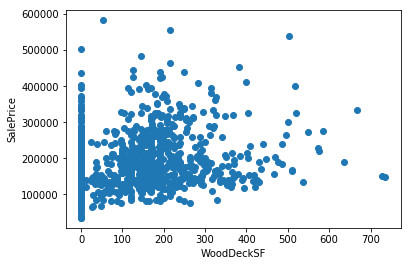

In [89]:
# plot per House Sales Price and WoodDeckSF
plt.scatter(house['WoodDeckSF'], house['SalePrice'])
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

- We can see WoodDeckSF and Sales price are not much correlated 

Text(0,0.5,'SalePrice')

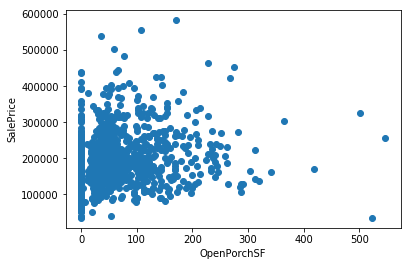

In [90]:
# plot per House Sales Price and OpenPorchSF
plt.scatter(house['OpenPorchSF'], house['SalePrice'])
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

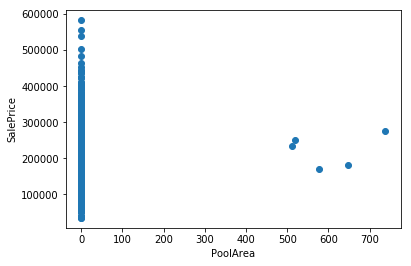

In [91]:
# plot per House PoolArea and BsmtFinSF1
plt.scatter(house['PoolArea'], house['SalePrice'])
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')

- We can see pool Area  and Sales price are not much correlated 

Text(0,0.5,'SalePrice')

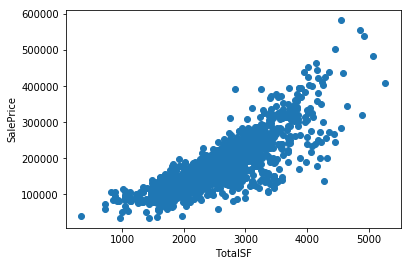

In [92]:
# plot per House Sales Price and TotalSF
plt.scatter(house['TotalSF'], house['SalePrice'])
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')

 - We can see there is high  some correlation that when GarageArea increases , sales Price increases

In [93]:
#Lets check the correlation betweek all numeric variable 
cor = house_numeric.corr()


In [94]:
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
LotFrontage,1.000000,0.402886,0.113791,0.063354,0.137471,0.121509,0.037190,0.130805,0.291937,0.345178,0.055570,0.040106,0.302235,0.054881,-0.002188,0.160865,0.040721,0.250956,0.002391,0.289787,0.205760,0.101721,0.268052,0.294913,0.075266,0.113853,0.026491,0.075427,0.042528,0.069125,0.002997,0.327692,0.358125
LotArea,0.402886,1.000000,0.033879,0.020585,0.097802,0.173838,0.092290,0.037972,0.268193,0.347822,0.093697,0.003714,0.334601,0.111344,0.033520,0.153017,0.069260,0.216847,-0.022610,0.286510,0.300794,0.112954,0.227949,0.250724,0.189664,0.132256,-0.005502,0.054056,0.102884,0.071415,0.034420,0.352197,0.369392
YearBuilt,0.113791,0.033879,1.000000,0.594781,0.303741,0.246773,-0.057765,0.142463,0.402730,0.280343,0.018506,-0.172211,0.201759,0.185172,-0.038267,0.478478,0.239974,-0.069872,-0.175329,0.090133,0.143719,0.273548,0.546134,0.492436,0.227817,0.185811,-0.396536,0.032652,-0.041230,-0.014274,-0.032803,0.560146,0.364480
YearRemodAdd,0.063354,0.020585,0.594781,1.000000,0.158942,0.121720,-0.068908,0.169096,0.291820,0.232675,0.139003,-0.068241,0.285017,0.122490,-0.014499,0.438572,0.180130,-0.043770,-0.148223,0.180261,0.101073,0.144563,0.417833,0.372805,0.209770,0.219686,-0.193776,0.046924,-0.043544,-0.009080,-0.007939,0.533612,0.353592
MasVnrArea,0.137471,0.097802,0.303741,0.158942,1.000000,0.223718,-0.074250,0.086811,0.309387,0.293958,0.159559,-0.068822,0.347460,0.079308,0.012589,0.254518,0.191303,0.105357,-0.033184,0.258865,0.227374,0.133952,0.349368,0.348222,0.138198,0.095848,-0.104188,0.024366,0.076918,-0.015411,-0.029629,0.447046,0.405046
BsmtFinSF1,0.121509,0.173838,0.246773,0.121720,0.223718,1.000000,-0.063883,-0.550098,0.451838,0.371175,-0.178297,-0.061337,0.102486,0.655586,0.073822,0.028017,-0.012189,-0.114519,-0.088324,-0.015918,0.218228,0.117977,0.217227,0.266268,0.188974,0.075940,-0.115756,0.032859,0.079030,0.017913,0.005279,0.382026,0.317143
BsmtFinSF2,0.037190,0.092290,-0.057765,-0.068908,-0.074250,-0.063883,1.000000,-0.212955,0.097692,0.094832,-0.109740,0.020111,-0.027580,0.146090,0.079416,-0.089749,-0.032710,-0.021455,-0.039672,-0.049408,0.036750,0.033979,-0.044864,-0.022115,0.079192,0.004935,0.039786,-0.030098,0.093297,0.056298,0.005921,-0.037249,0.032998
BsmtUnfSF,0.130805,0.037972,0.142463,0.169096,0.086811,-0.550098,-0.212955,1.000000,0.423911,0.312627,0.007788,0.022371,0.234428,-0.430714,-0.100434,0.280046,-0.051591,0.164985,0.033872,0.240431,0.042559,0.038447,0.196084,0.163580,-0.021251,0.119980,-0.005278,0.023938,-0.022372,-0.031437,-0.023027,0.196849,0.385135
TotalBsmtSF,0.291937,0.268193,0.402730,0.291820,0.309387,0.451838,0.097692,0.423911,1.000000,0.787916,-0.229387,-0.033783,0.359934,0.294351,0.000998,0.304469,-0.083574,0.049626,-0.074468,0.229095,0.299139,0.184506,0.435208,0.461677,0.213769,0.217419,-0.115626,0.050099,0.098716,0.007337,-0.017381,0.618242,0.784581
1stFlrSF,0.345178,0.347822,0.280343,0.232675,0.293958,0.371175,0.094832,0.312627,0.787916,1.000000,-0.256587,-0.018078,0.490046,0.219305,0.004327,0.360075,-0.160174,0.132876,0.078579,0.363169,0.378453,0.170384,0.434886,0.465164,0.213641,0.176279,-0.090642,0.070857,0.101677,0.037370,-0.019597,0.594506,0.756208


In [95]:
# Sales Price has good correlation 
cor[cor['SalePrice'] >0.5]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
YearBuilt,0.113791,0.033879,1.000000,0.594781,0.303741,0.246773,-0.057765,0.142463,0.402730,0.280343,0.018506,-0.172211,0.201759,0.185172,-0.038267,0.478478,0.239974,-0.069872,-0.175329,0.090133,0.143719,0.273548,0.546134,0.492436,0.227817,0.185811,-0.396536,0.032652,-0.041230,-0.014274,-0.032803,0.560146,0.364480
YearRemodAdd,0.063354,0.020585,0.594781,1.000000,0.158942,0.121720,-0.068908,0.169096,0.291820,0.232675,0.139003,-0.068241,0.285017,0.122490,-0.014499,0.438572,0.180130,-0.043770,-0.148223,0.180261,0.101073,0.144563,0.417833,0.372805,0.209770,0.219686,-0.193776,0.046924,-0.043544,-0.009080,-0.007939,0.533612,0.353592
TotalBsmtSF,0.291937,0.268193,0.402730,0.291820,0.309387,0.451838,0.097692,0.423911,1.000000,0.787916,-0.229387,-0.033783,0.359934,0.294351,0.000998,0.304469,-0.083574,0.049626,-0.074468,0.229095,0.299139,0.184506,0.435208,0.461677,0.213769,0.217419,-0.115626,0.050099,0.098716,0.007337,-0.017381,0.618242,0.784581
1stFlrSF,0.345178,0.347822,0.280343,0.232675,0.293958,0.371175,0.094832,0.312627,0.787916,1.000000,-0.256587,-0.018078,0.490046,0.219305,0.004327,0.360075,-0.160174,0.132876,0.078579,0.363169,0.378453,0.170384,0.434886,0.465164,0.213641,0.176279,-0.090642,0.070857,0.101677,0.037370,-0.019597,0.594506,0.756208
GrLivArea,0.302235,0.334601,0.201759,0.285017,0.347460,0.102486,-0.027580,0.234428,0.359934,0.490046,0.711503,0.125276,1.000000,-0.002607,-0.029725,0.630287,0.432758,0.556912,0.115777,0.832994,0.439915,0.165312,0.465800,0.450523,0.231571,0.302990,0.006327,0.028895,0.099814,0.069123,0.001317,0.709487,0.857713
FullBath,0.160865,0.153017,0.478478,0.438572,0.254518,0.028017,-0.089749,0.280046,0.304469,0.360075,0.416262,-0.005089,0.630287,-0.076586,-0.061555,1.000000,0.135629,0.355086,0.133584,0.541680,0.224123,0.135081,0.469092,0.409796,0.190991,0.254922,-0.128413,0.038755,-0.010112,0.022792,-0.013368,0.567989,0.588070
TotRmsAbvGrd,0.289787,0.286510,0.090133,0.180261,0.258865,-0.015918,-0.049408,0.240431,0.229095,0.363169,0.627761,0.116300,0.832994,-0.074354,-0.025245,0.541680,0.345541,0.692128,0.267624,1.000000,0.301757,0.090590,0.346437,0.317922,0.163963,0.213509,-0.000473,-0.003492,0.046238,0.043830,0.027873,0.523552,0.675442
GarageCars,0.268052,0.227949,0.546134,0.417833,0.349368,0.217227,-0.044864,0.196084,0.435208,0.434886,0.183143,-0.112518,0.465800,0.127158,-0.020990,0.469092,0.217580,0.089422,-0.047447,0.346437,0.286829,0.604123,1.000000,0.887825,0.211145,0.206902,-0.149609,0.039709,0.044719,0.004779,-0.043624,0.653560,0.555381
GarageArea,0.294913,0.250724,0.492436,0.372805,0.348222,0.266268,-0.022115,0.163580,0.461677,0.465164,0.138579,-0.085312,0.450523,0.170339,-0.021294,0.409796,0.161239,0.073786,-0.060530,0.317922,0.248554,0.577452,0.887825,1.000000,0.207437,0.229749,-0.119485,0.040960,0.051137,0.013765,-0.028569,0.649428,0.557659
SalePrice,0.327692,0.352197,0.560146,0.533612,0.447046,0.382026,-0.037249,0.196849,0.618242,0.594506,0.321489,-0.058602,0.709487,0.228632,-0.033171,0.567989,0.291815,0.175826,-0.142336,0.523552,0.454074,0.277151,0.653560,0.649428,0.318637,0.332122,-0.141077,0.056434,0.104080,0.038044,-0.019476,1.000000,0.814411


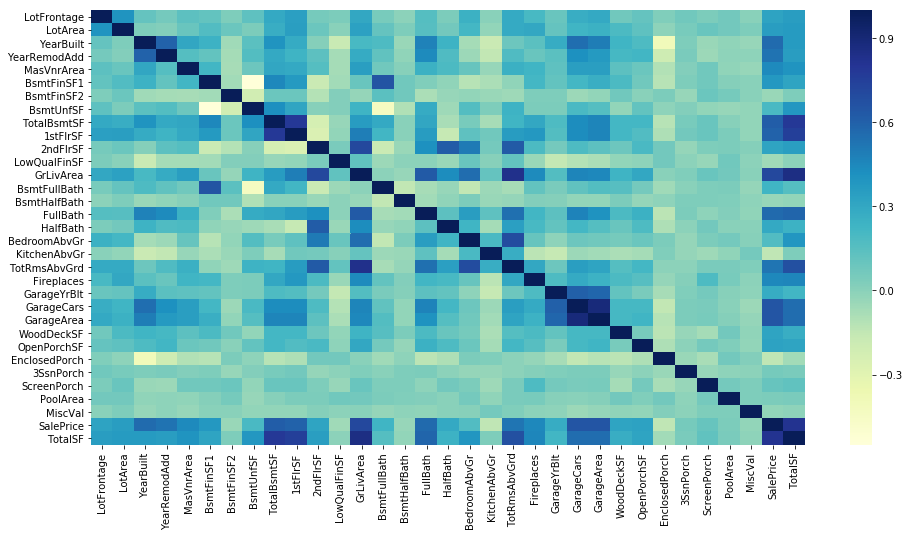

In [96]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()


The heatmap shows some useful insights:

Sales price is highly correlated with Garage year build , Grlive area , 1stflrsrf, TotalBSMTSF,Garagearea, Garagecar,Yearbuilt
Yearremodel,Fullbath



## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [97]:
# split into X and y

X = house.drop(columns=['SalePrice'])
X.head(2)

y = house['SalePrice']


In [98]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,2,2008,WD,Normal
1,20,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,5,2007,WD,Normal
2,60,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,9,2008,WD,Normal
3,70,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,2,2006,WD,Abnorml
4,60,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,12,2008,WD,Normal


In [99]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [100]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [101]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [102]:
# concat dummy variables with house
house = pd.concat([house, house_dummies], axis=1)

In [103]:
# drop categorical variables from house
house = house.drop(list(house_categorical.columns), axis=1)

In [104]:
X.shape

(1429, 277)

In [105]:
house.shape

(1429, 278)

In [106]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=277)

## 3. Model Building and Evaluation

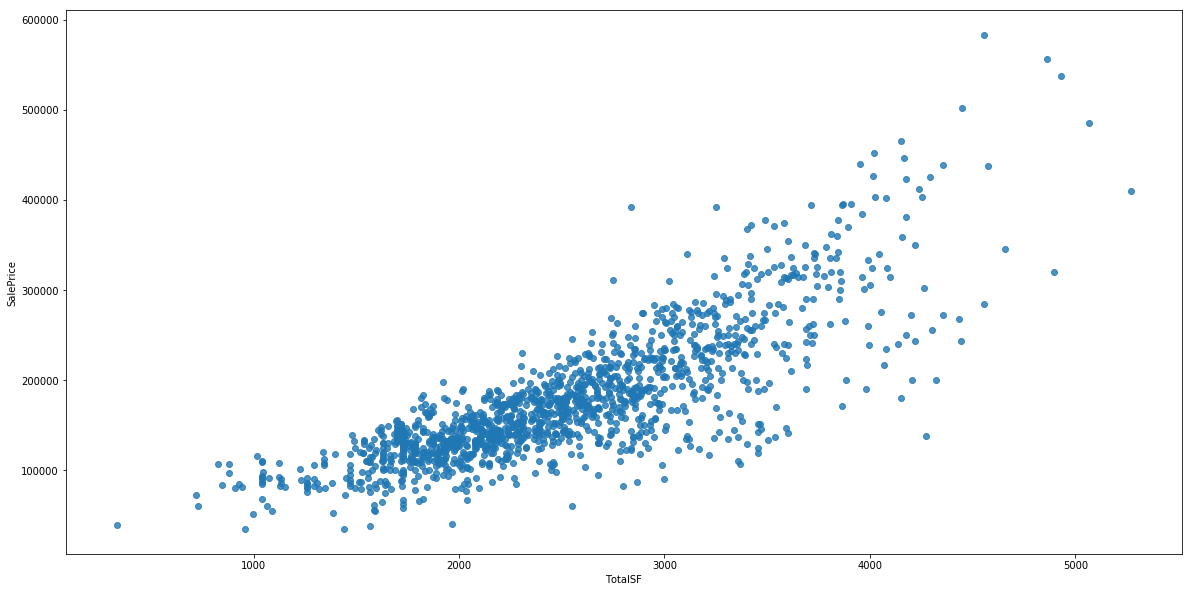

In [107]:
# visualise area-price relationship
plt.figure(figsize=(20, 10))
sns.regplot(x="TotalSF", y="SalePrice", data=house, fit_reg=False)

plt.show()

- There is very high correlation between total area and Sales Price 

## Lasso Regression -HyperTune the HyperParameter (Alpha)/




## Lasso

In [108]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import re
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split


In [109]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [110]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   17.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123556,0.018849,0.000798,0.000399,0.0001,{'alpha': 0.0001},-15311.872324,-15153.426996,-15058.140806,-15815.075546,-15291.836267,-15326.070388,261.568961,25,-9721.140818,-9768.140882,-9916.148616,-10049.863367,-9653.768306,-9821.812398,142.941094
1,0.119042,0.008076,0.000399,0.000489,0.001,{'alpha': 0.001},-15312.340210,-15153.416326,-15058.058534,-15814.943638,-15291.733067,-15326.098355,261.535619,26,-9721.146280,-9768.141146,-9916.149709,-10049.865405,-9653.772224,-9821.814953,142.940178
2,0.117398,0.002543,0.000199,0.000399,0.01,{'alpha': 0.01},-15317.006773,-15153.309634,-15057.235906,-15813.624841,-15290.701215,-15326.375674,261.212658,28,-9721.202872,-9768.146399,-9916.165605,-10049.887957,-9653.812425,-9821.843052,142.931655
3,0.112072,0.009477,0.000652,0.000536,0.05,{'alpha': 0.05},-15330.270974,-15152.834243,-15053.582120,-15807.768919,-15286.117611,-15326.114773,259.964595,27,-9721.450423,-9768.178081,-9916.241257,-10050.001010,-9653.997464,-9821.973647,142.896984
4,0.115717,0.005942,0.000199,0.000399,0.1,{'alpha': 0.1},-15332.859365,-15152.217349,-15049.020628,-15800.265502,-15280.400878,-15322.952744,258.428191,24,-9721.789202,-9768.216308,-9916.344982,-10050.168533,-9654.237946,-9822.151394,142.857087
5,0.111059,0.008298,0.000399,0.000489,0.2,{'alpha': 0.2},-15330.047768,-15150.996454,-15039.726398,-15787.276216,-15269.119684,-15315.433304,256.143727,23,-9722.471425,-9768.296929,-9916.542539,-10050.473716,-9654.683172,-9822.493556,142.774081
6,0.107135,0.011391,0.000399,0.000488,0.3,{'alpha': 0.3},-15325.526025,-15149.783431,-15032.617030,-15780.246548,-15257.858753,-15309.206357,255.616547,22,-9723.202506,-9768.379543,-9916.779690,-10050.791795,-9655.108242,-9822.852355,142.698423
7,0.117954,0.010531,0.000199,0.000399,0.4,{'alpha': 0.4},-15327.778185,-15148.569282,-15027.546293,-15775.201145,-15247.753375,-15305.369656,255.474298,21,-9723.974582,-9768.454187,-9917.017581,-10051.200111,-9655.499611,-9823.229214,142.654823
8,0.112473,0.004026,0.000803,0.000754,0.5,{'alpha': 0.5},-15323.247870,-15147.573058,-15022.474394,-15769.327923,-15253.521642,-15303.228977,254.232848,20,-9724.709518,-9768.576280,-9917.146147,-10051.610680,-9655.882184,-9823.584962,142.601510
9,0.109377,0.006378,0.000000,0.000000,0.6,{'alpha': 0.6},-15318.463181,-15145.913447,-15017.584457,-15763.534275,-15252.088652,-15299.516802,253.377366,19,-9725.457133,-9768.838558,-9917.274803,-10051.963924,-9656.344776,-9823.975839,142.498766


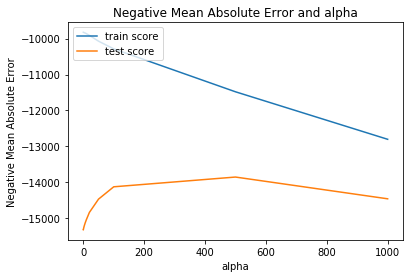

In [112]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
model_cv.best_params_

{'alpha': 500}

In [114]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(sklearn.metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(sklearn.metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9566210755666598
0.8806179674243453


R2 on test data is coming as .95 which is really good value.

In [115]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
impfeat = list(zip(cols, model_parameters))

In [116]:
impfeat.sort( key= lambda x:abs(x[1]))
impfeat

[('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.0),
 ('MSSubClass_180', 0.0),
 ('MSSubClass_20', 0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RM', -0.0),
 ('Alley_None', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_FR3', -0.0),
 ('Neighborhood_Sawyer', 0.0),
 ('Condition1_Feedr', 0.0),
 ('Condition1_PosA', -0.0),
 ('BldgType_2fmCon', -0.0),
 ('HouseStyle_1Story', -0.0),
 ('HouseStyle_2.5Unf', 0.0),
 ('HouseStyle_2Story', -0.0),
 ('OverallQual_6', -0.0),
 ('OverallCond_6', 0.0),
 ('RoofStyle_Gable', -0.0),
 ('Exterior1st_AsphShn', -0.0),
 ('Exterior1st_HdBoard', -0.0),
 ('Exterior1st_MetalSd', -0.0),
 ('Exterior1st_Plywood', -0.0),
 ('Exterior1st_Stone', 0.0),
 ('Exterior1st_VinylSd', 0.0),
 ('Exterior1st_Wd Sdng', -0.0),
 ('Exterior2nd_AsphShn', -0.0),
 ('Exterior2nd_Brk Cmn', -0.0),
 ('Exterior2nd_HdBoar

### As per above Model below are the important parameter that impact positively sales price 

- TotalSF
- GrLivArea
- YearBuilt
- SaleType_New
- OverallQual_8
- OverallQual_9
- BsmtFinSF1
- LotArea
- OverallQual_10
- GarageArea
- Neighborhood_Crawfor
- BsmtExposure_Gd
- Exterior1st_CemntBd
- Functional_Typ
- SaleCondition_Normal
- Neighborhood_NridgHt
- Condition1_Norm
- OverallCond_7
- MasVnrArea
- OverallQual_7
- Neighborhood_Somerst
- Neighborhood_StoneBr
- Exterior1st_BrkFace
- PoolArea
- YearRemodAdd
- MSZoning_RL
- Exterior2nd_VinylSd
- LotConfig_CulDSac
- OverallCond_8
- WoodDeckSF
- BsmtFinType1_GLQ
- 2ndFlrSF
- Exterior1st_Stucco
- RoofStyle_Shed
- CentralAir_Y
- Fireplaces
- Neighborhood_BrkSide
- OverallCond_9
- MoSold_7
- Neighborhood_NPkVill
- MSSubClass_60
- MoSold_5
- ScreenPorch
- Neighborhood_NoRidge
- Exterior2nd_Wd Sdng
- BsmtFinType1_Unf
- Neighborhood_Veenker
- BsmtFullBath
- LotShape_Reg
- SaleCondition_Alloca
- Fence_MnPrv
- EnclosedPorch
- BsmtCond_TA
- LandSlope_Mod
- Condition1_RRAn
- OpenPorchSF
- LotShape_IR2
- FullBath
- HouseStyle_1.5Unf
- Neighborhood_BrDale
- Electrical_FuseP
- HeatingQC_Po
- RoofStyle_Gambrel
- SaleType_Con
- MSSubClass_30
- GarageType_Detchd
- RoofStyle_Hip
- Neighborhood_SWISU
- FireplaceQu_Gd
- Foundation_PConc
- GarageQual_Gd
- 3SsnPorch
- Functional_Mod
- LotFrontage
- ExterCond_Fa
- HouseStyle_SLvl
- MiscVal
- MSZoning_RH
- Functional_Min2
- Neighborhood_Blueste
- BsmtFinSF2
- Exterior1st_WdShing
- Exterior2nd_ImStucc
- BsmtFinType2_GLQ
- GarageType_None
- Condition1_PosN
- GarageCond_None
- Exterior2nd_Stone
- SaleType_Oth
- OverallQual_2
- GarageType_BuiltIn
- SaleType_ConLw
- MoSold_2
- HalfBath
- Neighborhood_SawyerW
- RoofStyle_Mansard
- MiscFeature_Othr
- MoSold_10
- MoSold_6
- MoSold_4
- GarageQual_None
- YrSold_2008
- TotRmsAbvGrd
- SaleCondition_Family
- MSSubClass_70
- Electrical_Mix
- Alley_Pave
- SaleType_ConLD
- SaleCondition_AdjLand
- Fence_MnWw

-Below are the fields that negatively impact the Sales Price

Exterior2nd_MetalSd
 -  SaleType_ConLI
 -  Condition1_RRNn
 -  Condition1_RRNe
 -  FireplaceQu_TA
 -  BsmtFinType2_Rec
 -  BsmtHalfBath
 -  Neighborhood_IDOTRR
 -  Exterior2nd_BrkFace
 -  GarageQual_Fa
 -  BsmtCond_Gd
 -  Exterior1st_ImStucc
 -  MSSubClass_85
 -  HouseStyle_SFoyer
 -  MoSold_12
 -  HeatingQC_Fa
 -  Functional_Maj2
 -  Exterior1st_CBlock
 -  OverallQual_4
 -  Exterior2nd_Other
 -  BldgType_Duplex
 -  FireplaceQu_Fa
 -  MSSubClass_50
 -  YrSold_2009
 -  Neighborhood_NAmes
 -  Exterior2nd_Plywood
 -  LowQualFinSF
 -  BsmtFinType1_BLQ
 -  Functional_Min1
 -  OverallCond_2
 -  MSSubClass_160
 -  Neighborhood_ClearCr
 -  GarageCond_Gd
 -  Fence_GdWo
 -  ExterCond_Po
 -  GarageType_CarPort
 -  Neighborhood_Gilbert
 -  BsmtFinType2_Unf
 -  PavedDrive_P
 -  Neighborhood_OldTown
 -  LandContour_Low
 -  Neighborhood_NWAmes
 -  MasVnrType_BrkFace
 -  LotConfig_Inside
 -  BsmtFinType1_Rec
 -  OverallQual_3
 -  BsmtFinType2_BLQ
 -  PavedDrive_Y
 -  GarageFinish_RFn
 -  OverallQual_5
 -  HeatingQC_Gd
 -  MSSubClass_190
 -  Neighborhood_MeadowV
 -  BsmtExposure_Mn
 -  GarageQual_Po
 -  GarageCond_Fa
 -  LotConfig_FR2
 -  ExterCond_Gd
 -  Neighborhood_CollgCr
 -  Exterior1st_BrkComm
 -  HeatingQC_TA
 -  KitchenQual_Fa
 -  BsmtQual_Fa
 -  LotShape_IR3
 -  Foundation_Wood
 -  Foundation_CBlock
 -  Neighborhood_Timber
 -  BsmtExposure_No
 -  HouseStyle_2.5Fin
 -  MSSubClass_90
 -  MiscFeature_TenC
 -  ExterQual_Fa
 -  Condition1_RRAe
 -  OverallCond_4
 -  GarageType_Basment
 -  Neighborhood_Edwards
 -  SaleCondition_Partial
 -  BldgType_TwnhsE
 -  KitchenQual_TA
 -  BldgType_Twnhs
 -  OverallCond_5
 -  Neighborhood_Mitchel
 -  Exterior2nd_CmentBd
 -  LandSlope_Sev
 -  BedroomAbvGr
 -  KitchenQual_Gd
 -  OverallCond_3
 -  KitchenAbvGr
 -  BsmtQual_TA
 -  ExterQual_Gd
 -  BsmtQual_Gd
 -  ExterQual_TA




In [117]:
#AIC and BIC scores after LASSO
n = len(house)
k = 204
resid = np.subtract(y_test_pred , y_test)
rss = np.sum(np.power(resid,2))
aic_score = n * np.log(rss/n) + 2*k
print("AIC :{}".format(aic_score))
BIC = n * np.log(rss/n) + k*np.log(n)
print("BIC :{}".format(BIC))

AIC :27634.103277296475
BIC :28708.10823359417


## Ridge Regression

In [118]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [119]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010372,0.001018,0.000998,1.092406e-03,0.0001,{'alpha': 0.0001},-15364.190360,-15161.091123,-15069.719487,-15793.388925,-15373.143958,-15352.306771,249.618858,27,-9708.595566,-9751.414069,-9910.678158,-10042.991750,-9650.098575,-9812.755624,143.990914
1,0.009973,0.001093,0.000997,3.371748e-07,0.001,{'alpha': 0.001},-15363.870666,-15161.138244,-15069.294771,-15793.301487,-15372.402825,-15352.001599,249.661630,26,-9708.686136,-9751.481666,-9910.704609,-10043.029410,-9650.106140,-9812.801592,143.985986
2,0.008776,0.000746,0.000598,4.884609e-04,0.01,{'alpha': 0.01},-15360.707916,-15161.579411,-15065.176992,-15792.433990,-15366.080784,-15349.195819,250.097708,25,-9709.580056,-9752.144361,-9910.960691,-10043.399349,-9650.188596,-9813.254611,143.935041
3,0.010971,0.000892,0.000598,4.885000e-04,0.05,{'alpha': 0.05},-15347.311320,-15162.972315,-15049.213455,-15788.686232,-15344.763661,-15338.589397,251.905201,24,-9713.314728,-9754.733468,-9911.959091,-10044.932669,-9650.806001,-9815.149191,143.667397
4,0.009574,0.000798,0.000798,3.988982e-04,0.1,{'alpha': 0.1},-15331.774256,-15164.243661,-15033.021222,-15784.130516,-15326.550768,-15327.944085,253.732140,23,-9717.706804,-9757.298571,-9913.314223,-10046.677744,-9651.981430,-9817.395755,143.305297


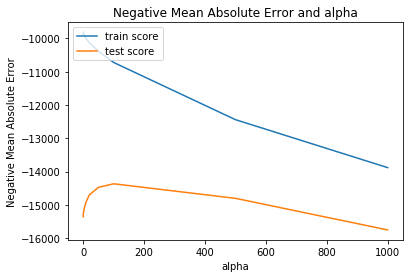

In [120]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [121]:
model_cv.best_params_

{'alpha': 100}

In [122]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.07768896e+03,  5.15974183e+03,  4.99476891e+03,  2.54677973e+03,
        3.31277477e+03,  5.74114564e+03,  1.81015304e+01, -9.93367760e+02,
        5.14698024e+03,  4.99706104e+03,  5.02799399e+03, -4.47406178e+02,
        8.04238451e+03,  1.29970117e+03, -3.30003784e+02,  2.42878862e+03,
        1.41697802e+03, -1.62834482e+03, -2.13045348e+03,  1.95908441e+03,
        1.88005724e+03, -3.32276454e+01,  1.62375958e+03,  4.85864945e+03,
        2.07102024e+03,  1.19987831e+03,  5.79284042e+02,  7.83891794e+02,
        1.18156300e+03,  2.23430666e+03,  9.81426004e+02,  8.21116062e+03,
       -6.01205536e+02,  2.03358103e+01, -7.93571864e+02,  5.33217139e+02,
        2.64876901e+02,  1.20784963e+02,  2.00287469e+02, -2.48819285e+02,
        2.20749405e+03,  7.06587215e-01,  1.92790892e+01, -1.64335704e+02,
       -3.46458268e+02, -9.65136115e+02,  5.24885527e+02,  3.94224461e+02,
        1.84886444e+03,  1.03921667e+00,  9.89744988e+01,  2.76308045e+02,
        1.04493514e+03, -

In [123]:
# model with optimal alpha
# Ridge regression
lmr = Ridge(alpha=500)
lmr.fit(X_train, y_train)

# predict
y_train_pred = lmr.predict(X_train)
print(sklearn.metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmr.predict(X_test)
print(sklearn.metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9390905263991907
0.8756764217097915


R2 is coming as 0.93  which is reallt good value

In [124]:
# Ridge model parameters
model_parameters = list(lmr.coef_)
model_parameters.insert(0, lmr.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
impf = list(zip(cols, model_parameters))
impf

[('constant', 177143.32),
 ('LotFrontage', 1441.008),
 ('LotArea', 3781.604),
 ('YearBuilt', 2258.97),
 ('YearRemodAdd', 2503.755),
 ('MasVnrArea', 3041.578),
 ('BsmtFinSF1', 4568.839),
 ('BsmtFinSF2', 88.33),
 ('BsmtUnfSF', -505.342),
 ('TotalBsmtSF', 4441.669),
 ('1stFlrSF', 4622.709),
 ('2ndFlrSF', 3012.456),
 ('LowQualFinSF', -427.725),
 ('GrLivArea', 5976.748),
 ('BsmtFullBath', 1636.63),
 ('BsmtHalfBath', -378.846),
 ('FullBath', 2675.317),
 ('HalfBath', 1695.2),
 ('BedroomAbvGr', -234.85),
 ('KitchenAbvGr', -1478.206),
 ('TotRmsAbvGrd', 3024.818),
 ('Fireplaces', 1966.23),
 ('GarageYrBlt', 107.338),
 ('GarageCars', 2665.158),
 ('GarageArea', 4243.594),
 ('WoodDeckSF', 2049.722),
 ('OpenPorchSF', 1747.378),
 ('EnclosedPorch', 98.935),
 ('3SsnPorch', 709.023),
 ('ScreenPorch', 1144.629),
 ('PoolArea', 1319.934),
 ('MiscVal', 269.788),
 ('TotalSF', 6441.868),
 ('MSSubClass_160', -789.364),
 ('MSSubClass_180', -195.533),
 ('MSSubClass_190', -664.78),
 ('MSSubClass_20', 200.632),
 ('

In [125]:
impf.sort( key= lambda x:abs(x[1]))
impf

[('Exterior1st_AsphShn', -0.0),
 ('Functional_Sev', -0.0),
 ('MiscFeature_Shed', 1.264),
 ('BsmtQual_None', 3.992),
 ('BsmtCond_None', 3.992),
 ('BsmtFinType1_None', 3.992),
 ('BsmtFinType2_None', 3.992),
 ('YrSold_2007', 4.966),
 ('MiscFeature_Othr', 5.798),
 ('Exterior2nd_Brk Cmn', -8.503),
 ('LotShape_Reg', 14.189),
 ('RoofStyle_Mansard', -19.556),
 ('GarageType_None', -21.306),
 ('GarageFinish_None', -21.306),
 ('GarageQual_None', -21.306),
 ('GarageCond_None', -21.306),
 ('Neighborhood_SWISU', 23.131),
 ('BsmtCond_Po', -27.838),
 ('BsmtFinType1_LwQ', -30.616),
 ('Foundation_Slab', -31.265),
 ('GarageCond_Po', -33.648),
 ('Fence_None', -36.655),
 ('Neighborhood_ClearCr', 37.307),
 ('Electrical_Mix', -39.355),
 ('SaleType_ConLI', -39.547),
 ('MoSold_4', 58.319),
 ('Neighborhood_SawyerW', -60.663),
 ('Condition1_PosN', 61.861),
 ('MSZoning_RH', 62.855),
 ('MoSold_2', -64.593),
 ('SaleType_Oth', -65.473),
 ('Exterior2nd_Other', -65.926),
 ('MoSold_12', 69.012),
 ('Exterior1st_ImStucc'

- These are the variables that impact Sales Price Positively
 
 - TotalSF
 - GrLivArea
 - OverallQual_9
 - 1stFlrSF
 - BsmtFinSF1
 - TotalBsmtSF
 - GarageArea
 - OverallQual_10
 - OverallQual_8
 - LotArea
 - Neighborhood_NridgHt
 - MasVnrArea
 - TotRmsAbvGrd
 - 2ndFlrSF
 - SaleType_New
 - BsmtExposure_Gd
 - FullBath
 - GarageCars
 - YearRemodAdd
 - Neighborhood_Crawfor
 - SaleCondition_Partial
 - Neighborhood_StoneBr
 - YearBuilt
 - BsmtFinType1_GLQ
 - WoodDeckSF
 - Fireplaces
 - MSSubClass_60
 - OpenPorchSF
 - HalfBath
 - Condition1_Norm
 - BsmtFullBath
 - LotConfig_CulDSac
 - OverallCond_7
 - Neighborhood_NoRidge
 - Exterior1st_CemntBd
 - GarageType_BuiltIn
 - LotFrontage
 - CentralAir_Y
 - Exterior1st_BrkFace
 - Foundation_PConc
 - PoolArea
 - LandSlope_Mod
 - Neighborhood_Somerst
 - Functional_Typ
 - RoofStyle_Hip
 - MasVnrType_Stone
 - MSZoning_RL
 - ScreenPorch
 - FireplaceQu_Gd
 - LotShape_IR2
 - HouseStyle_2Story
 - RoofStyle_Shed
 - SaleCondition_Normal
 - OverallCond_9
 - GarageQual_Gd
 - Neighborhood_Veenker
 - OverallCond_8
 - MoSold_7
 - 3SsnPorch
 - Exterior1st_Stucco
 - Exterior2nd_CmentBd
 - RoofStyle_Gambrel
 - BsmtCond_TA
 - Neighborhood_BrkSide
 - LandContour_HLS
 - Exterior2nd_VinylSd
 - Exterior2nd_Wd Sdng
 - Functional_Mod
 - Neighborhood_NPkVill
 - MSZoning_FV
 - SaleType_Con
 - MSSubClass_40
 - Condition1_RRAn
 - HouseStyle_2.5Unf
 - MoSold_5
 - PavedDrive_Y
 - Neighborhood_BrDale
 - Alley_None
 - Exterior1st_Stone
 - Fence_MnPrv
 - MSSubClass_70
 - GarageCond_TA
 - Exterior2nd_Stone
 - MiscVal
 - BsmtFinType2_LwQ
 - SaleCondition_Alloca
 - GarageType_Attchd
 - BsmtFinType2_GLQ
 - MSSubClass_45
 - Neighborhood_Blueste
 - HeatingQC_Po
 - Exterior1st_VinylSd
 - Electrical_SBrkr
 - BsmtCond_Gd
 - Alley_Pave
 - Electrical_FuseP
 - MSSubClass_20
 - SaleType_ConLw
 - LandContour_Lvl
 - Exterior2nd_ImStucc
 - Exterior2nd_Stucco
 - SaleType_CWD
 - HouseStyle_1.5Unf
 - ExterCond_TA
 - YrSold_2008
 - Condition1_PosA
 - MoSold_8
 - GarageYrBlt
 - Foundation_Stone
 - EnclosedPorch
 - MiscFeature_None
 - MoSold_9
 - ExterCond_Fa
 - BsmtFinSF2
 - Fence_MnWw
 - MoSold_11
 - YrSold_2010
 - Exterior2nd_AsphShn
 - SaleCondition_AdjLand
 - MSSubClass_50
 - Exterior1st_ImStucc
 - MoSold_12
 - MSZoning_RH
 - Condition1_PosN
 - MoSold_4
 - Neighborhood_ClearCr
 - Neighborhood_SWISU
 - LotShape_Reg
 - MiscFeature_Othr
 - YrSold_2007
 - BsmtQual_None
 - BsmtCond_None
 - BsmtFinType1_None
 - BsmtFinType2_None
 - MiscFeature_Shed


These are the variables that impact Price negatively , means if these variables value increases , Sales Price Descreases

 - Exterior2nd_Brk Cmn
 - RoofStyle_Mansard
 - GarageType_None
 - GarageFinish_None
 - GarageQual_None
 - GarageCond_None
 - BsmtCond_Po
 - BsmtFinType1_LwQ
 - Foundation_Slab
 - GarageCond_Po
 - Fence_None
 - Electrical_Mix
 - SaleType_ConLI
 - Neighborhood_SawyerW
 - MoSold_2
 - SaleType_Oth
 - Exterior2nd_Other
 - MSSubClass_75
 - OverallQual_7
 - Electrical_FuseF
 - GarageType_Detchd
 - MoSold_10
 - GarageCond_Gd
 - MoSold_6
 - BsmtExposure_None
 - MasVnrType_None
 - BsmtQual_Fa
 - YrSold_2009
 - Exterior2nd_BrkFace
 - GarageQual_TA
 - Exterior1st_WdShing
 - MasVnrType_BrkFace
 - Exterior1st_CBlock
 - Exterior2nd_CBlock
 - BsmtFinType2_Unf
 - OverallCond_6
 - MSSubClass_180
 - MSSubClass_80
 - HouseStyle_SLvl
 - GarageQual_Po
 - SaleType_ConLD
 - LandContour_Low
 - BedroomAbvGr
 - OverallQual_2
 - Condition1_RRNe
 - HouseStyle_SFoyer
 - FireplaceQu_Po
 - ExterCond_Po
 - Condition1_RRNn
 - MSSubClass_85
 - PavedDrive_P
 - LotConfig_FR3
 - BsmtFinType2_BLQ
 - Exterior1st_Plywood
 - Exterior1st_MetalSd
 - Functional_Maj2
 - BsmtExposure_Mn
 - MSSubClass_30
 - BsmtHalfBath
 - ExterCond_Gd
 - Exterior2nd_HdBoard
 - Exterior2nd_Wd Shng
 - GarageQual_Fa
 - ExterQual_Gd
 - FireplaceQu_Fa
 - FireplaceQu_TA
 - Exterior2nd_MetalSd
 - LowQualFinSF
 - Exterior1st_Wd Sdng
 - BsmtFinType2_Rec
 - Foundation_Wood
 - Functional_Min2
 - MoSold_3
 - BsmtFinType1_BLQ
 - LotShape_IR3
 - GarageType_CarPort
 - BsmtUnfSF
 - BldgType_2fmCon
 - OverallCond_5
 - ExterQual_Fa
 - HeatingQC_Fa
 - Neighborhood_Timber
 - KitchenQual_Fa
 - LotConfig_Inside
 - Exterior2nd_Plywood
 - Neighborhood_Sawyer
 - LotConfig_FR2
 - Exterior1st_HdBoard
 - Neighborhood_IDOTRR
 - Neighborhood_NWAmes
 - Neighborhood_CollgCr
 - SaleCondition_Family
 - BsmtFinType1_Unf
 - MSSubClass_190
 - Fence_GdWo
 - GarageCond_Fa
 - Functional_Min1
 - MiscFeature_TenC
 - GarageFinish_RFn
 - Condition1_Feedr
 - OverallCond_2
 - HouseStyle_2.5Fin
 - MSSubClass_160
 - MSZoning_RM
 - BsmtFinType1_Rec
 - HeatingQC_Gd
 - MSSubClass_90
 - BldgType_Duplex
 - Neighborhood_OldTown
 - Neighborhood_Gilbert
 - Exterior1st_BrkComm
 - GarageFinish_Unf
 - HouseStyle_1Story
 - OverallQual_3
 - KitchenQual_Gd
 - Condition1_RRAe
 - SaleType_WD
 - Foundation_CBlock
 - RoofStyle_Gable
 - BldgType_Twnhs
 - Neighborhood_MeadowV
 - Neighborhood_NAmes
 - HeatingQC_TA
 - BldgType_TwnhsE
 - Neighborhood_Mitchel
 - OverallQual_4
 - FireplaceQu_None
 - LandSlope_Sev
 - OverallCond_4
 - KitchenAbvGr
 - GarageType_Basment
 - Neighborhood_Edwards
 - OverallCond_3
 - BsmtExposure_No
 - OverallQual_6
 - BsmtQual_Gd
 - KitchenQual_TA
 - OverallQual_5
 - BsmtQual_TA
 - ExterQual_TA


In [126]:
#AIC and BIC score after Ridge Regression
n = len(house)
k = len(impf)
resid = np.subtract(y_test_pred , y_test)
rss = np.sum(np.power(resid,2))
aic_score = n * np.log(rss/n) + 2*k
print("AIC :{}".format(aic_score))
BIC = n * np.log(rss/n) + k*np.log(n)
print("BIC :{}".format(BIC))

AIC :27840.062031724614
BIC :29303.657021189116


### Polynomial Regression- Overfitting example for Subjective Question 1

You already know simple linear regression:

$y = \beta_0 + \beta_1 x_1$

In polynomial regression of degree $n$, we fit a curve of the form:

$y = \beta_0 + \beta_1 x_1 + \beta_2x_1^2 + \beta_3x_1^3 ... + \beta_nx_1^n$

In the experiment below, we have fitted polynomials of various degrees on the housing data and compared their performance on train and test sets.

In sklearn, polynomial features can be generated using the `PolynomialFeatures` class. Also, to perform `LinearRegression` and `PolynomialFeatures` in tandem, we will use the module `sklearn_pipeline` - it basically creates the features and feeds the output to the model (in that sequence).

In [127]:
# filter only area and price
df = house.loc[:, ['TotalSF', 'SalePrice']]
df.head()

,TotalSF,SalePrice
0,2566,208500
1,2524,181500
2,2706,223500
3,2473,140000
4,3343,250000


In [128]:
# recaling the variables (both)
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,TotalSF,SalePrice
0,0.452096,0.316769
1,0.443589,0.267502
2,0.480454,0.344140
3,0.433259,0.191777
4,0.609479,0.392495


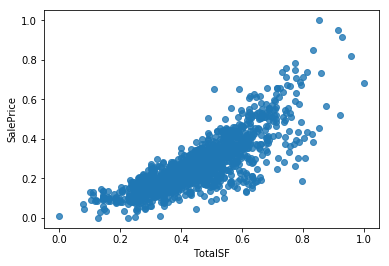

In [129]:
# visualise area-price relationship
sns.regplot(x="TotalSF", y="SalePrice", data=df, fit_reg=False)

In [130]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

1000
429


In [131]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['TotalSF']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['SalePrice']

X_test = df_test['TotalSF']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['SalePrice']

In [132]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10,20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

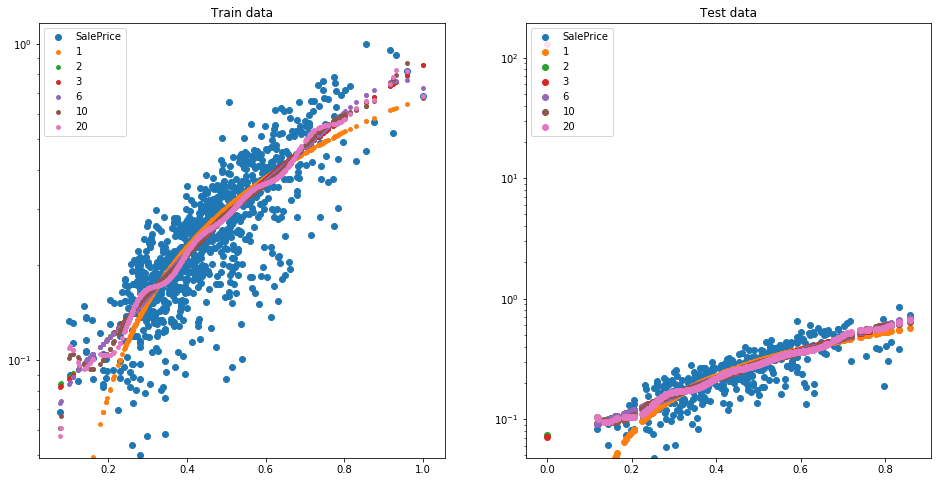

In [133]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [134]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.66, test score=0.67
Polynomial degree 2: train score=0.68, test score=0.67
Polynomial degree 3: train score=0.68, test score=0.67
Polynomial degree 6: train score=0.69, test score=0.66
Polynomial degree 10: train score=0.69, test score=0.04
Polynomial degree 20: train score=0.69, test score=-2473.23
